In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

In [2]:
A = pd.read_excel("/content/Online Retail.xlsx")
A.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print(A.shape)

(541909, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
A.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
A.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
A.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
A['CustomerID'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
15070.0,1
15753.0,1
17065.0,1


In [8]:
A['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [9]:
A['Description'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [10]:
A['Quantity'].value_counts().tail(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Quantity,
4000,1
-304,1
-1681,1
430,1
-118,1
588,1
188,1
-271,1
-420,1


In [11]:
A['StockCode'].value_counts().head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
84879,1502
22720,1477
22197,1476
21212,1385


In [12]:
A['UnitPrice'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
UnitPrice,
1.25,50496
1.65,38181
0.85,28497
2.95,27768
0.42,24533
...,...
84.21,1
46.86,1
28.66,1


In [13]:
A[A['UnitPrice'] == 0].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,,,,,,,count
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,
537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,1
539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,1
568384,M,Manual,1,2011-09-27 09:46:00,0.0,12748.0,United Kingdom,1
569716,22778,GLASS CLOCHE SMALL,2,2011-10-06 08:17:00,0.0,15804.0,United Kingdom,1
571035,M,Manual,1,2011-10-13 12:50:00,0.0,12446.0,RSA,1
572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,2011-10-26 14:36:00,0.0,18059.0,United Kingdom,1
574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-11-03 11:26:00,0.0,12415.0,Australia,1
574175,22065,CHRISTMAS PUDDING TRINKET POT,12,2011-11-03 11:47:00,0.0,14110.0,United Kingdom,1
574252,M,Manual,1,2011-11-03 13:24:00,0.0,12437.0,France,1


In [14]:
A['InvoiceNo'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
554023,1
554022,1
554021,1


In [15]:
A['InvoiceDate'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
InvoiceDate,
2011-10-31 14:41:00,1114
2011-12-08 09:28:00,749
2011-12-09 10:03:00,731
2011-12-05 17:24:00,721
2011-06-29 15:58:00,705
...,...
2011-09-28 09:57:00,1
2011-09-28 09:45:00,1
2011-03-16 12:13:00,1


In [16]:
nan_description = A[A['Description'].isnull()]
nan_indices_description = nan_description.index
nan_indices_description

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,   2026,
         2406,
       ...
       524473, 524475, 529667, 533711, 533712, 535322, 535326, 535332, 536981,
       538554],
      dtype='int64', length=1454)

In [17]:
nan_customerid = A[A['CustomerID'].isnull()]
nan_indices_customerid = nan_customerid.index
nan_indices_customerid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,   1450,
         1451,
       ...
       541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538, 541539,
       541540],
      dtype='int64', length=135080)

In [18]:
A.iloc[1446]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1446
InvoiceNo,536544
StockCode,21787
Description,RAIN PONCHO RETROSPOT
Quantity,2
InvoiceDate,2010-12-01 14:32:00
UnitPrice,1.66
CustomerID,NaN
Country,United Kingdom


In [19]:
missing_values = pd.DataFrame({'Feature': A.columns,
                              'No. of Missing Values': A.isnull().sum().values,
                              '% of Missing Values': ((A.isnull().sum().values)/len(A)*100)})
unique_values = pd.DataFrame({'Feature': A.columns,
                              'No. of Unique Values': A.nunique().values})
merged_df = pd.merge(missing_values, unique_values, on='Feature', how='left')
merged_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Feature,No. of Missing Values,% of Missing Values,No. of Unique Values
0,InvoiceNo,0,0.000000,25900
1,StockCode,0,0.000000,4070
2,Description,1454,0.268311,4223
3,Quantity,0,0.000000,722
4,InvoiceDate,0,0.000000,23260
5,UnitPrice,0,0.000000,1630
6,CustomerID,135080,24.926694,4372
7,Country,0,0.000000,38


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-d196c8c05779>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(unique_values, x='No. of Unique Values', y='Feature', inner='stick', palette='Dark2')


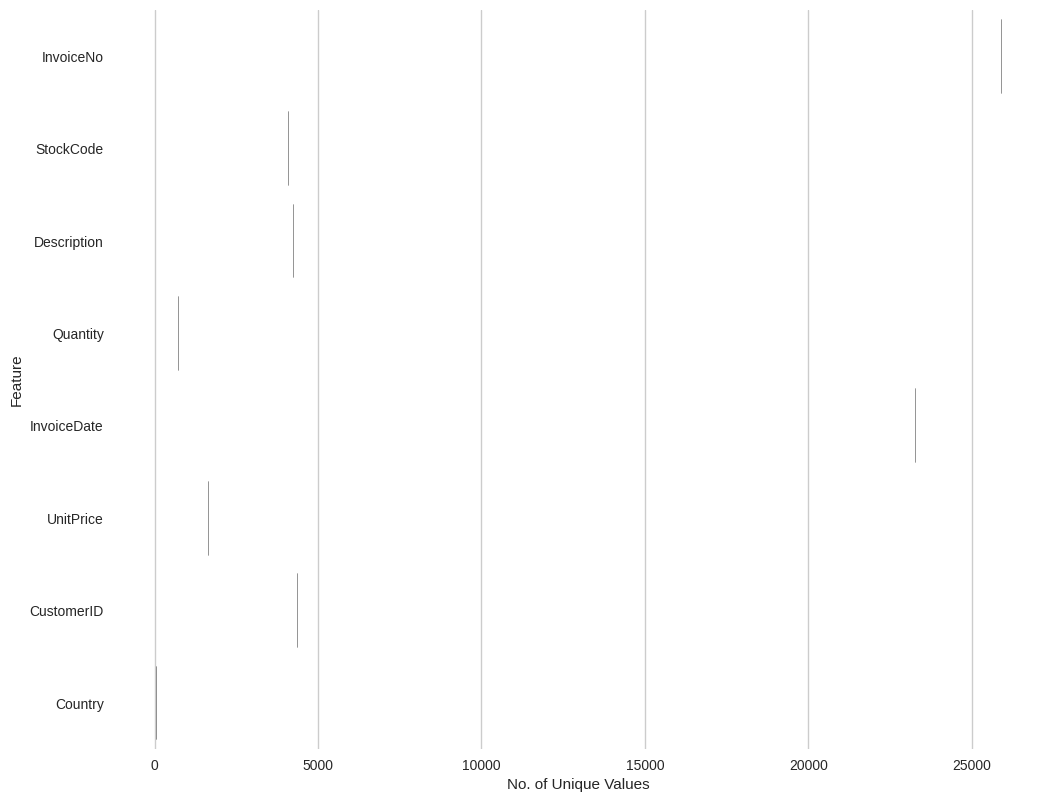

In [20]:
figsize = (12, 1.2 * len(unique_values['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(unique_values, x='No. of Unique Values', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [21]:
A['Description'].value_counts().head(5)     #top 5 products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638


In [22]:
B=A.dropna(subset=['CustomerID'])
B.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(406829, 8)

In [23]:
A[A['Quantity'] <= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [24]:
exclude_stock_codes = ['POST', 'D', 'M']

# Filter out rows with excluded stock codes
B = B[~B['StockCode'].isin(exclude_stock_codes)].copy()

# Create a new binary column 'IsReturn'
B['IsReturn'] = 0

# Mark rows with negative quantities as returns
B.loc[B['Quantity'] < 0, 'IsReturn'] = 1
B.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0


In [25]:
B.iloc[152]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,154
InvoiceNo,C536383
StockCode,35004C
Description,SET OF 3 COLOURED FLYING DUCKS
Quantity,-1
InvoiceDate,2010-12-01 09:49:00
UnitPrice,4.65
CustomerID,15311.0
Country,United Kingdom
IsReturn,1


In [26]:
B[B['UnitPrice'] <= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsReturn
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0


In [27]:
B = B[B['UnitPrice'] > 0]
B.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(405057, 9)

In [28]:
B['TotalAmount'] = B['Quantity'] * B['UnitPrice'] # Calculating the total amount by multiplying quantity by price
B.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-63700f578137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['TotalAmount'] = B['Quantity'] * B['UnitPrice'] # Calculating the total amount by multiplying quantity by price


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsReturn,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [29]:
current_date = max(B[B['IsReturn'] == 0]['InvoiceDate'])
current_date

# Calculating a New Attribute: Days_Since_Last_Purchase
customer_data = B[B['IsReturn'] == 0].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency (excluding returns)
}).reset_index()

customer_data = customer_data.rename(columns={'InvoiceDate': 'Days_Since_Last_Purchase'})
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [30]:
customer_data['Frequency'] = B[B['IsReturn'] == 0].groupby('CustomerID')['InvoiceNo'].nunique().values
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase,Frequency
0,12346.0,325,1
1,12347.0,1,7
2,12348.0,74,4
3,12349.0,18,1
4,12350.0,309,1


In [31]:
customer_data['Monetary_Value'] = B[B['IsReturn'] == 0].groupby('CustomerID')['TotalAmount'].sum().values
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1437.24
3,12349.0,18,1,1457.55
4,12350.0,309,1,294.40


In [32]:
basket_size = B[B['Quantity'] > 0].groupby(['CustomerID', 'InvoiceNo'])['Quantity'].mean().reset_index()
basket_size_grouped = basket_size.groupby('CustomerID')['Quantity'].mean().reset_index()
basket_size_grouped = basket_size_grouped.rename(columns={'Quantity': 'Basket_Size'})
customer_data = customer_data.merge(basket_size_grouped, on='CustomerID', how='inner')
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size
0,12346.0,325,1,77183.60,74215.000000
1,12347.0,1,7,4310.00,13.799245
2,12348.0,74,4,1437.24,93.250000
3,12349.0,18,1,1457.55,8.750000
4,12350.0,309,1,294.40,12.250000


In [33]:
customer_data = customer_data.merge(B.groupby('CustomerID')['IsReturn'].sum().reset_index(), on='CustomerID', how='left')
customer_data = customer_data.rename(columns={'IsReturn': 'No_of_Returns'})
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size,No_of_Returns
0,12346.0,325,1,77183.60,74215.000000,1
1,12347.0,1,7,4310.00,13.799245,0
2,12348.0,74,4,1437.24,93.250000,0
3,12349.0,18,1,1457.55,8.750000,0
4,12350.0,309,1,294.40,12.250000,0


In [34]:
customer_data = customer_data.merge(B[['CustomerID','Country']].drop_duplicates(), on='CustomerID', how='left')
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size,No_of_Returns,Country
0,12346.0,325,1,77183.60,74215.000000,1,United Kingdom
1,12347.0,1,7,4310.00,13.799245,0,Iceland
2,12348.0,74,4,1437.24,93.250000,0,Finland
3,12349.0,18,1,1457.55,8.750000,0,Italy
4,12350.0,309,1,294.40,12.250000,0,Norway


In [35]:
customer_data = customer_data.drop(['CustomerID'], axis=1)
customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size,No_of_Returns,Country
0,325,1,77183.60,74215.000000,1,United Kingdom
1,1,7,4310.00,13.799245,0,Iceland
2,74,4,1437.24,93.250000,0,Finland
3,18,1,1457.55,8.750000,0,Italy
4,309,1,294.40,12.250000,0,Norway


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


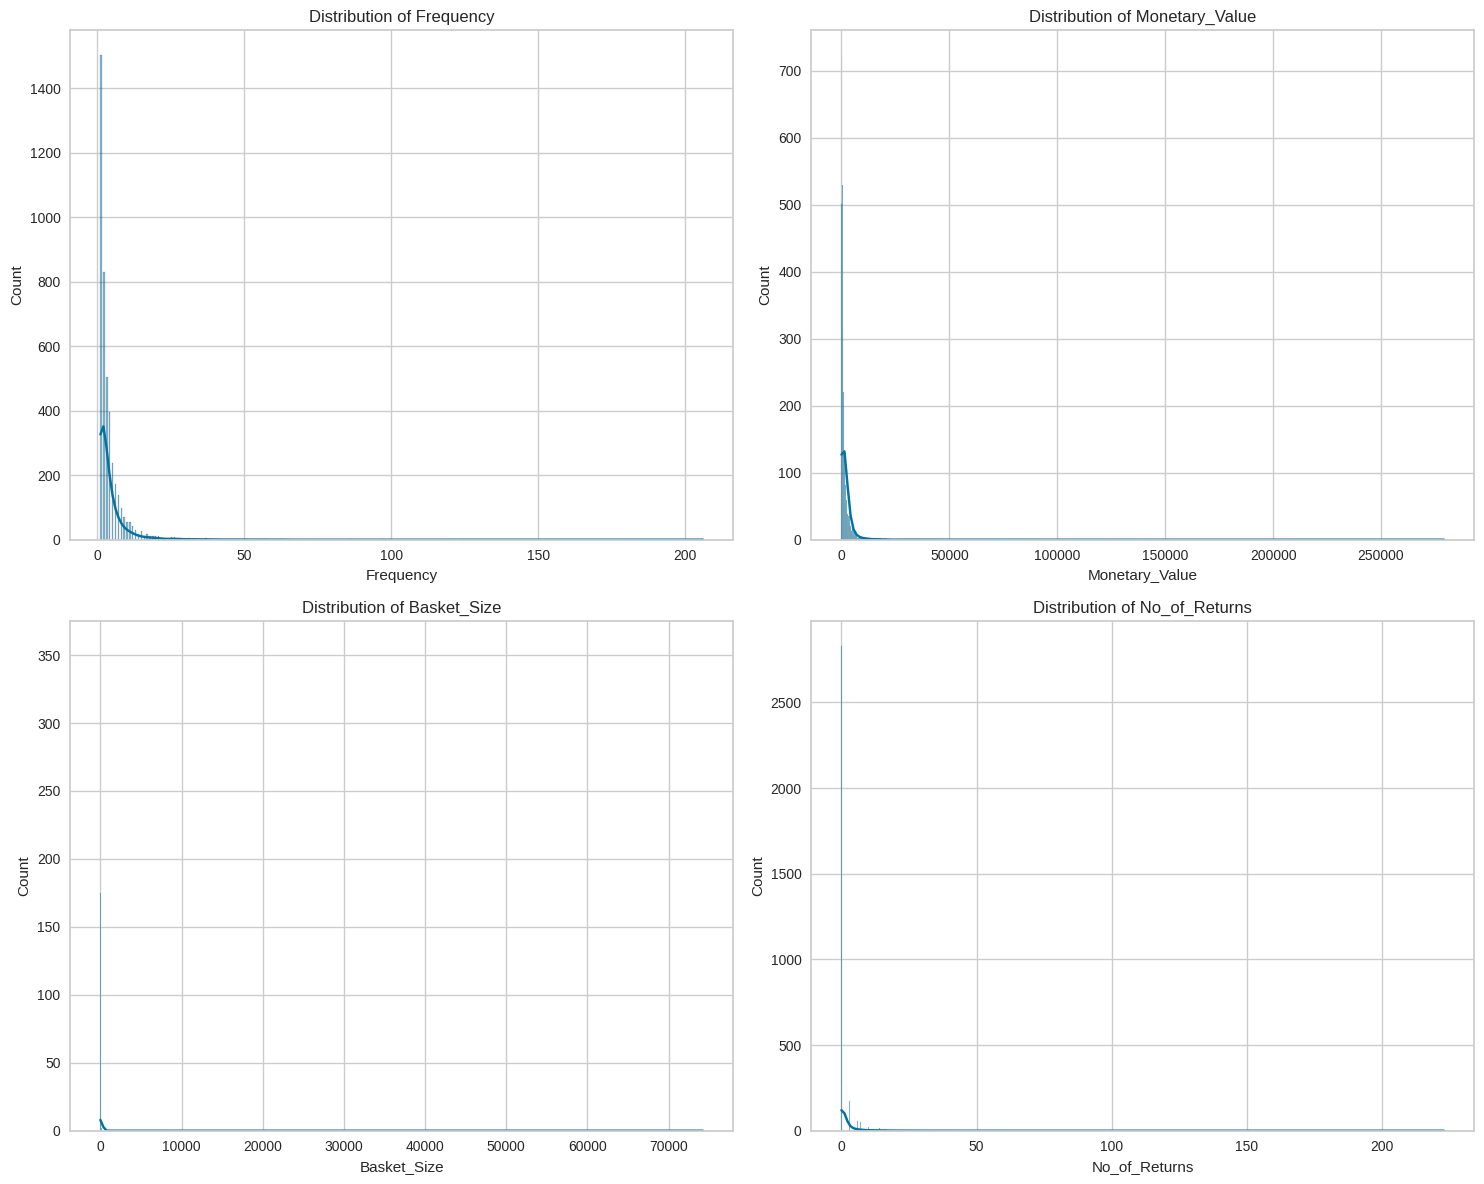

In [36]:
features = ['Frequency', 'Monetary_Value', 'Basket_Size', 'No_of_Returns']

# Set up the plotting area to display multiple plots in a single cell
plt.figure(figsize=(15, 12))

# Loop through each feature and create a histogram with KDE
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Adjust the grid size based on the number of features (2x2 here)
    sns.histplot(customer_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Display all plots in a single output
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Frequency', ylabel='Count'>

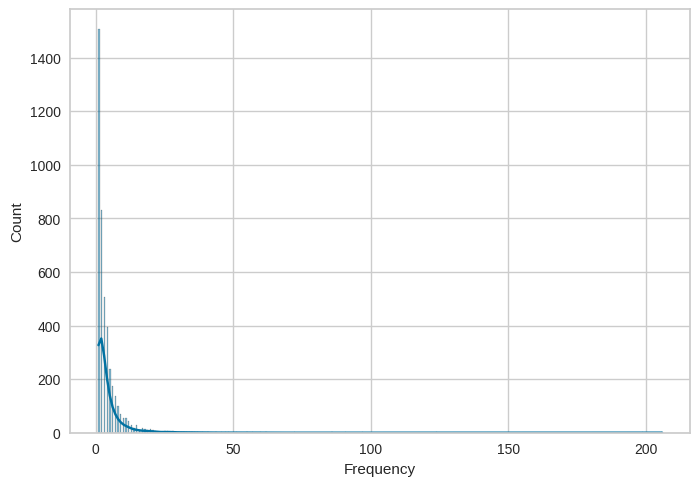

In [37]:
sns.histplot(customer_data['Frequency'], kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


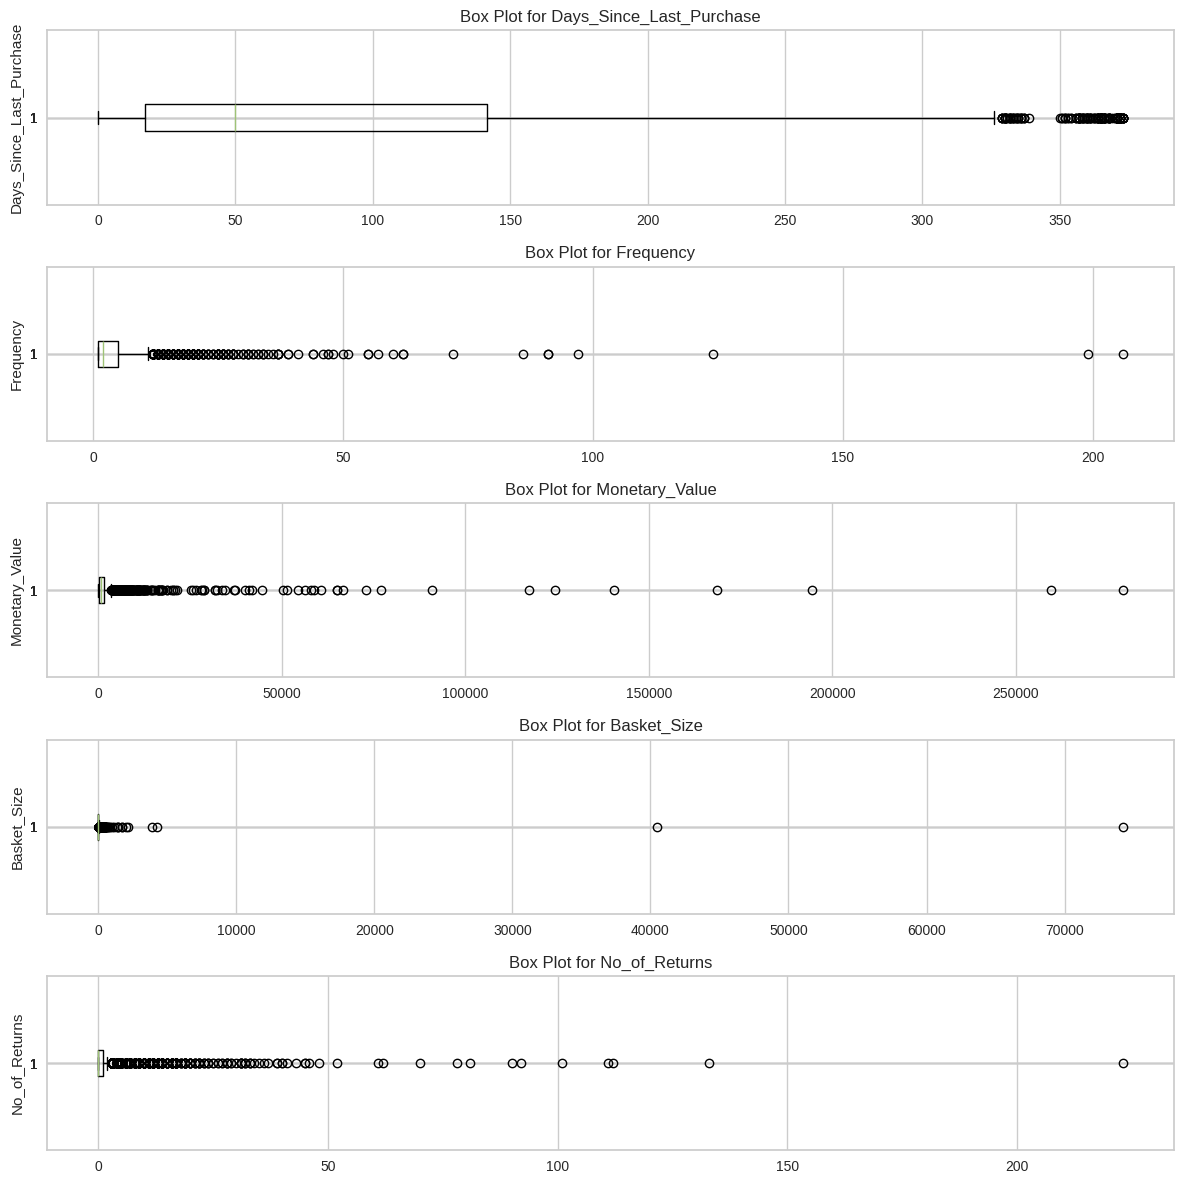

In [38]:
numerical_cols = ['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']

fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(12, 12), sharey=True)

for i, col in enumerate(numerical_cols):
  axes[i].boxplot(customer_data[col], vert=False)
  axes[i].set_title(f'Box Plot for {col}')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [39]:
def bounds(data,attribute):
    Q1 = data[attribute].quantile(0.15)
    Q3 = data[attribute].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return(upper_bound,lower_bound)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


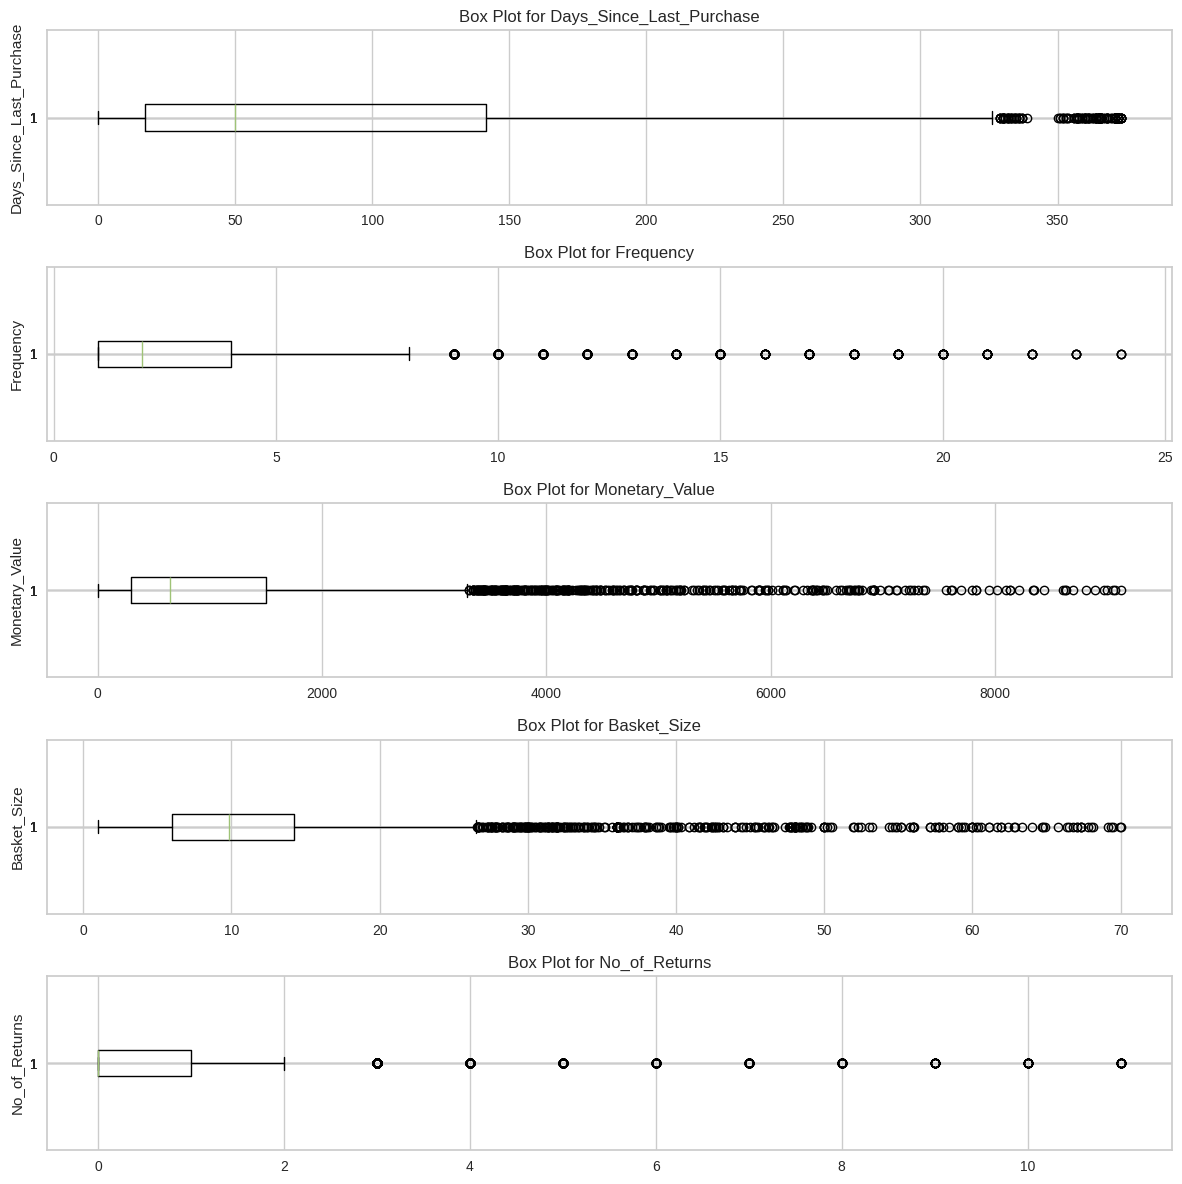

In [40]:
numerical_cols = ['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']

fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(12, 12), sharey=True)

for i, col in enumerate(numerical_cols):
  upper_bound,lower_bound = bounds(customer_data,col)
  customer_data = customer_data[customer_data[col]<upper_bound]
  axes[i].boxplot(customer_data[col], vert=False)
  axes[i].set_title(f'Box Plot for {col}')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-31f4c2505ff6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_variable, data=subset_data, palette='viridis', order=top_countries)


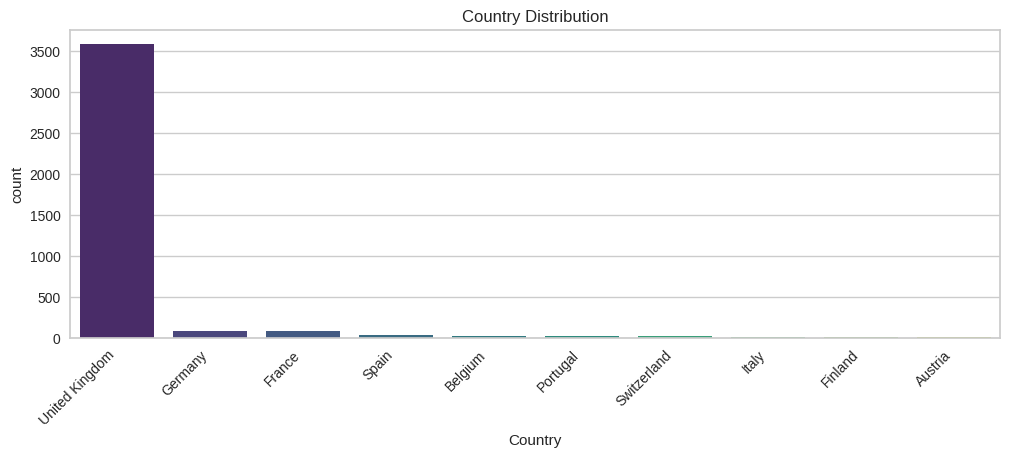

In [41]:
categorical_variable = 'Country'

# Get the top 10 categories
top_countries = customer_data[categorical_variable].value_counts().nlargest(10).index

# Subset the data for the top countries
subset_data = customer_data[customer_data[categorical_variable].isin(top_countries)]

# Set up the plot
plt.figure(figsize=(12, 4))
sns.countplot(x=categorical_variable, data=subset_data, palette='viridis', order=top_countries)
plt.title(f"{categorical_variable} Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


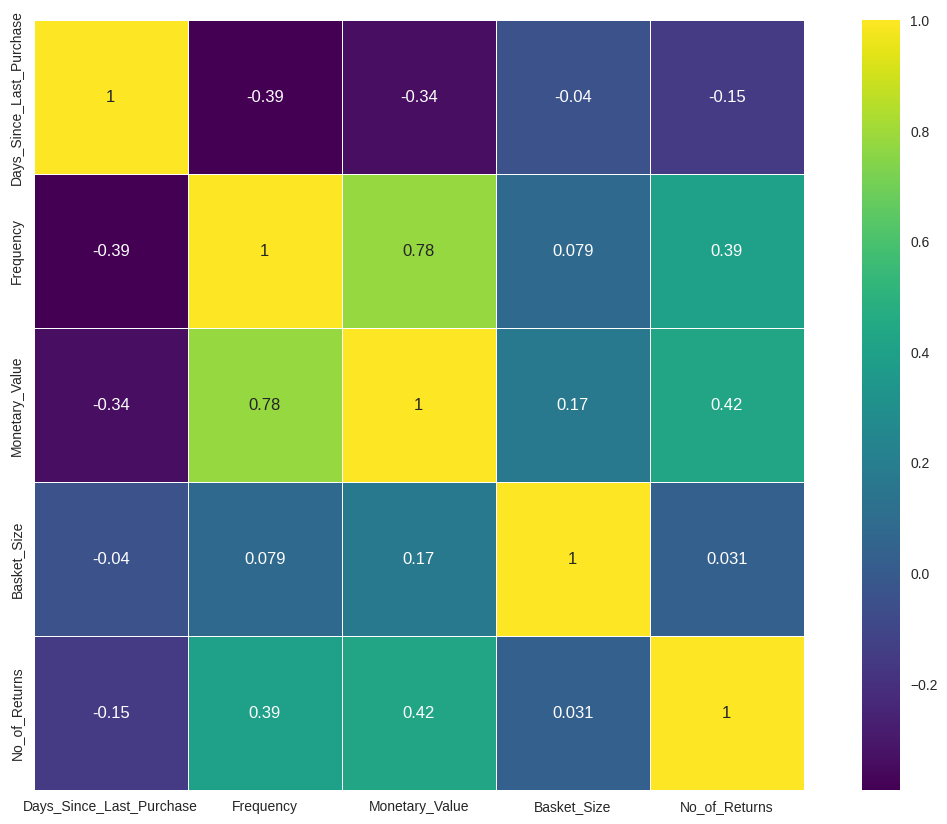

In [42]:
corr = customer_data[['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']].corr()


# Generate a heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(corr, cmap='viridis', annot=True,
                 square=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [43]:
top_countries = customer_data['Country'].value_counts().nlargest(10).index

# Subset the data for the top countries
customer_data[customer_data[categorical_variable].isin(top_countries)]['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Country,
United Kingdom,3579
France,80
Germany,80
Spain,27
Belgium,25
Portugal,19
Switzerland,19
Italy,13
Finland,11


In [44]:
top_countries = customer_data['Country'].value_counts().nlargest(5).index

customer_data = customer_data[customer_data[categorical_variable].isin(top_countries)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
encoded_customer_data = pd.get_dummies(customer_data, columns=['Country'], prefix='Country')

encoded_customer_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size,No_of_Returns,Country_Belgium,Country_France,Country_Germany,Country_Spain,Country_United Kingdom
7,231,1,1079.40,9.137931,0,False,False,False,True,False
14,286,1,174.90,10.000000,0,True,False,False,False,False
15,2,10,4737.23,9.017785,8,True,False,False,False,False
17,7,4,1208.10,57.165793,0,True,False,False,False,False
29,81,2,777.24,10.578947,1,True,False,False,False,False


In [46]:
scaler = StandardScaler()

numerical_columns = encoded_customer_data.select_dtypes(include=['float64', 'int64']).columns
dummy_columns = encoded_customer_data.select_dtypes(include=['bool']).columns

# fit_transform
encoded_customer_data[numerical_columns] = scaler.fit_transform(encoded_customer_data[numerical_columns])
customer_data_scaled = pd.concat([encoded_customer_data[numerical_columns], encoded_customer_data[dummy_columns]], axis=1)

customer_data_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Days_Since_Last_Purchase,Frequency,Monetary_Value,Basket_Size,No_of_Returns,Country_Belgium,Country_France,Country_Germany,Country_Spain,Country_United Kingdom
7,1.365878,-0.718856,0.001520,-0.286110,-0.488268,False,False,False,True,False
14,1.913751,-0.718856,-0.707110,-0.204067,-0.488268,True,False,False,False,False
15,-0.915264,2.067947,2.867244,-0.297544,3.667833,True,False,False,False,False
17,-0.865458,0.210078,0.102350,4.284677,-0.488268,True,False,False,False,False
29,-0.128320,-0.409212,-0.235207,-0.148969,0.031245,True,False,False,False,False


In [47]:
num_components = 3

# Initialize PCA with the desired number of components
pca = PCA(n_components=num_components)

# Fit and transform the scaled data
principal_components = pca.fit_transform(customer_data_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components + 1)]
customer_data_pca = pd.DataFrame(data=principal_components, columns=columns)

customer_data_pca.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3
0,-1.147923,-0.009670,0.786816
1,-1.753614,0.105200,1.161401
2,4.685279,-1.007089,1.739212
3,0.850973,4.182684,-0.902664
4,-0.327116,-0.133484,-0.084091


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


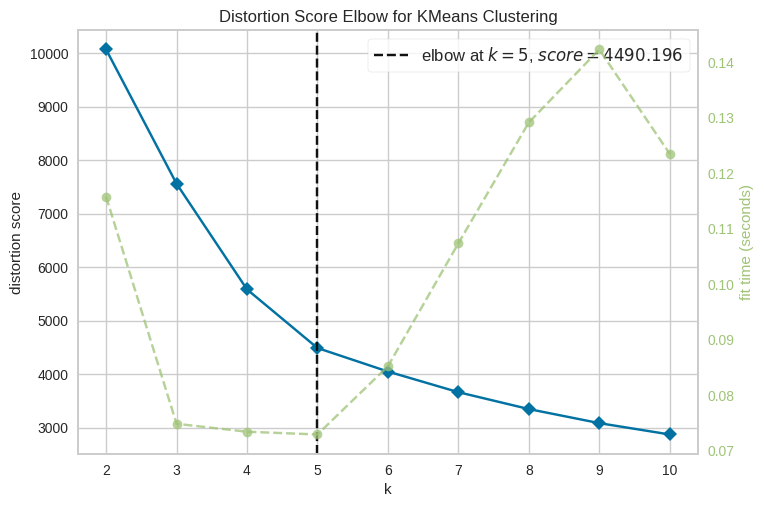

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer

# Using the elbow method to determine the number of clusters to be formed
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(customer_data_pca)
Elbow_M.show()

In [49]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(customer_data_pca)
customer_data_pca["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
customer_data["Clusters"]= yhat_AC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
fig = px.scatter_3d(customer_data_pca, x='PC1', y='PC2', z='PC3', color='Clusters',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    title='3D Scatter Plot of Clusters')

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



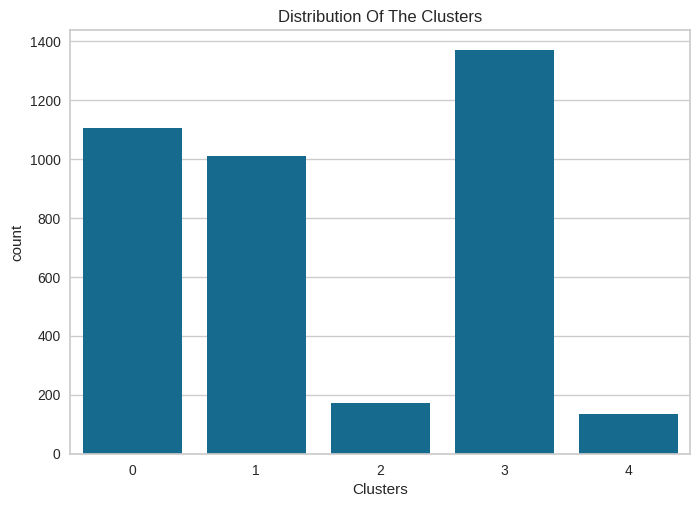

In [51]:
pl = sns.countplot(x=customer_data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



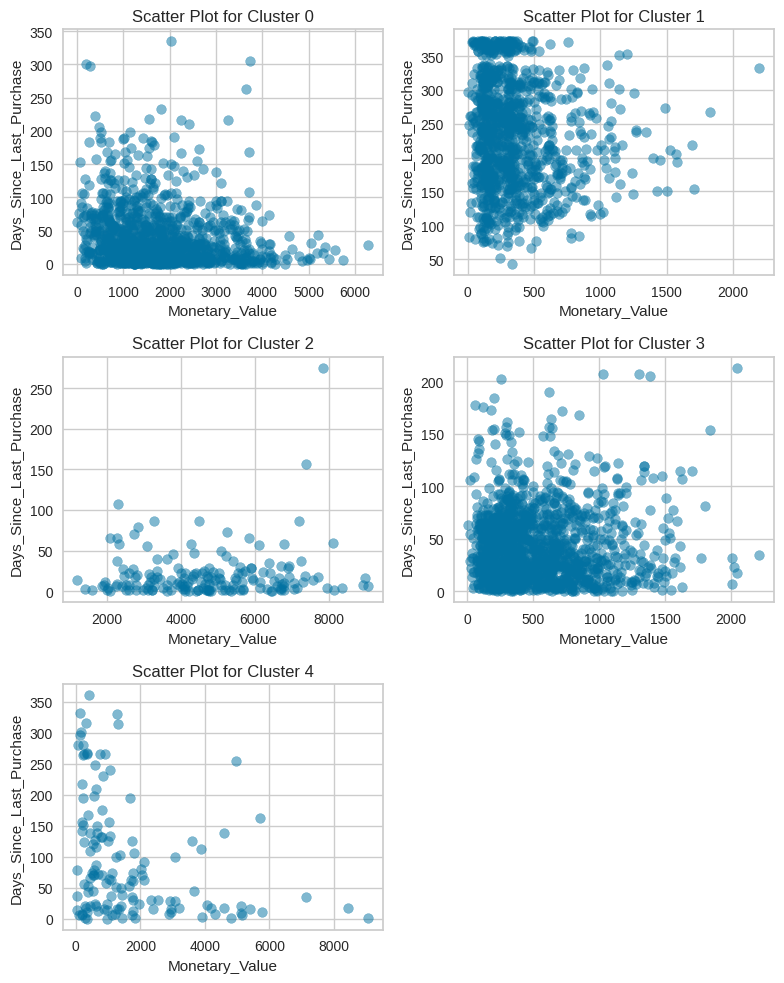

In [52]:
num_clusters = len(set(customer_data['Clusters']))

num_rows = 3
num_columns = 2

fig, axs = plt.subplots(num_rows, num_columns, figsize=(8, 10))

axs = axs.ravel()

for cluster_num in range(num_clusters):
    cluster_data = customer_data[customer_data['Clusters'] == cluster_num]

    # Select numeric columns for jittering
    numeric_cols = cluster_data.select_dtypes(include=[np.number])

    # Apply jittering to the numeric columns
    jittered_data = numeric_cols + np.random.normal(0, 0.02, numeric_cols.shape)

    ax = axs[cluster_num]
    ax.scatter(jittered_data['Monetary_Value'], jittered_data['Days_Since_Last_Purchase'], alpha=0.5)
    ax.set_title(f'Scatter Plot for Cluster {cluster_num}')
    ax.set_xlabel('Monetary_Value')
    ax.set_ylabel('Days_Since_Last_Purchase')

for i in range(num_clusters, num_rows * num_columns):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



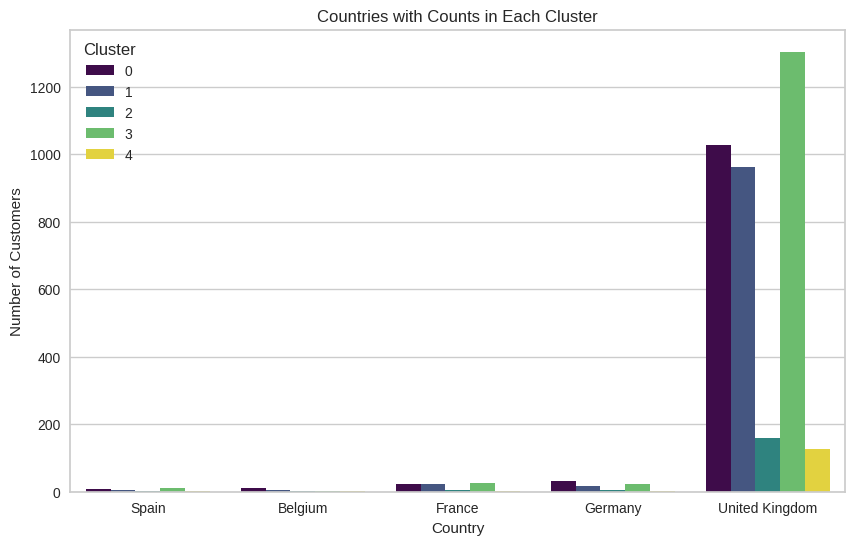

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x="Country", hue="Clusters", palette='viridis')
plt.title(f"Countries with Counts in Each Cluster")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.legend(title="Cluster")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-54-c925a6ff9180>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




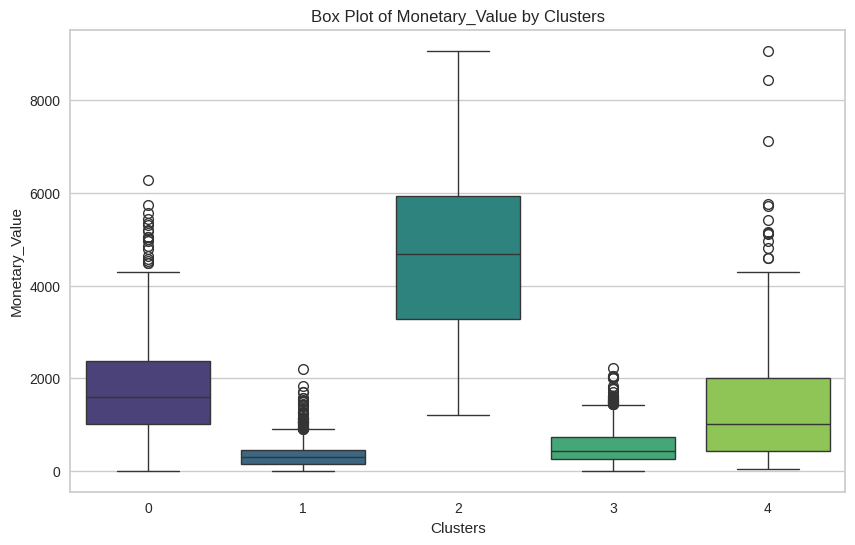

<ipython-input-54-c925a6ff9180>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




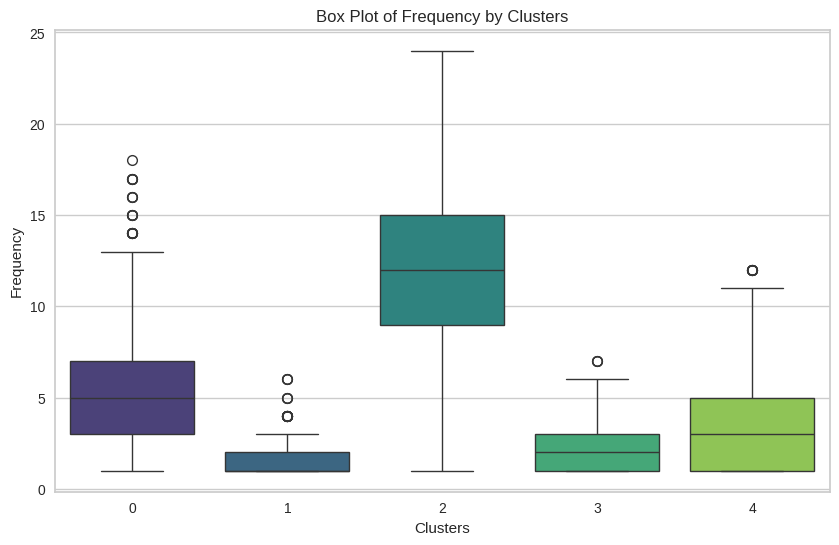

<ipython-input-54-c925a6ff9180>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




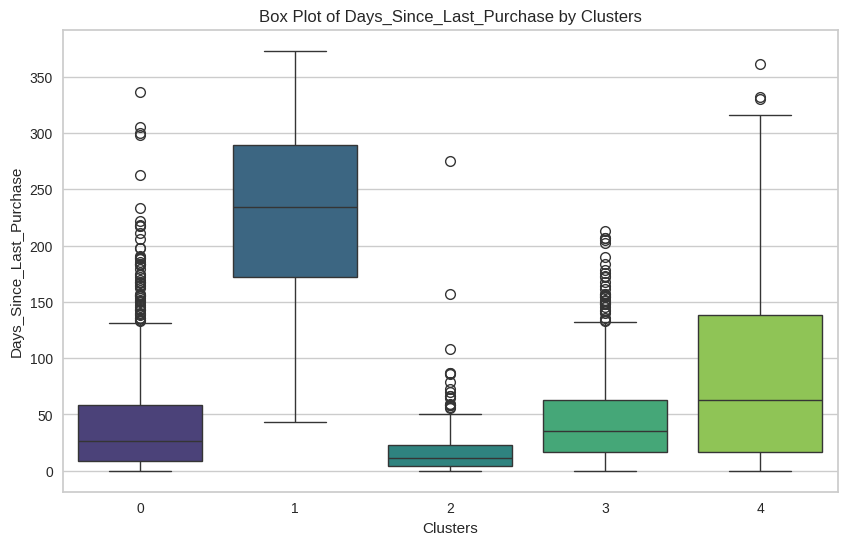

<ipython-input-54-c925a6ff9180>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




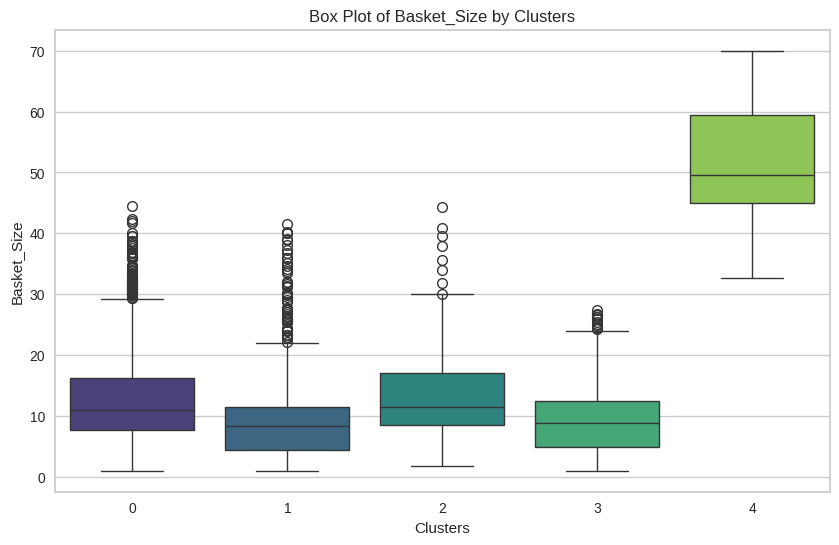

<ipython-input-54-c925a6ff9180>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




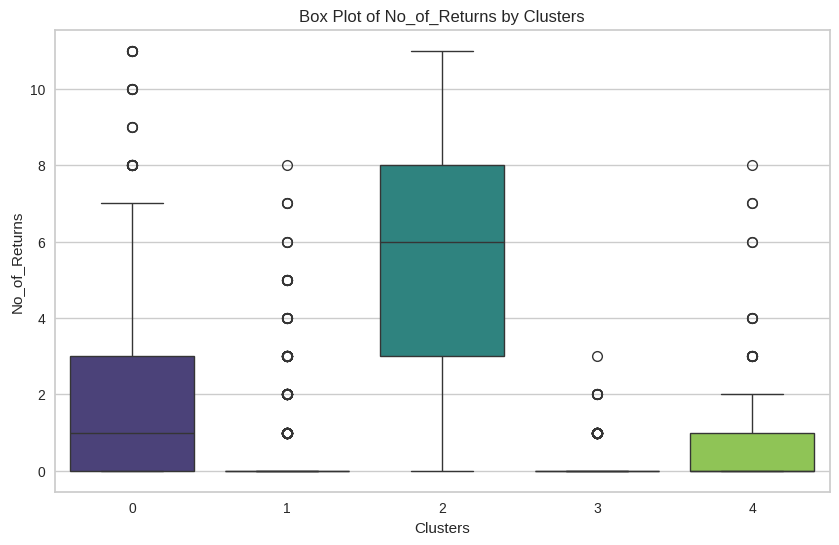

In [54]:
features_to_plot = ['Monetary_Value', 'Frequency', 'Days_Since_Last_Purchase', 'Basket_Size', 'No_of_Returns']

# Create a separate box plot for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Clusters', y=feature, data=customer_data, palette='viridis')
    plt.title(f'Box Plot of {feature} by Clusters')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-55-dd5b704b0720>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




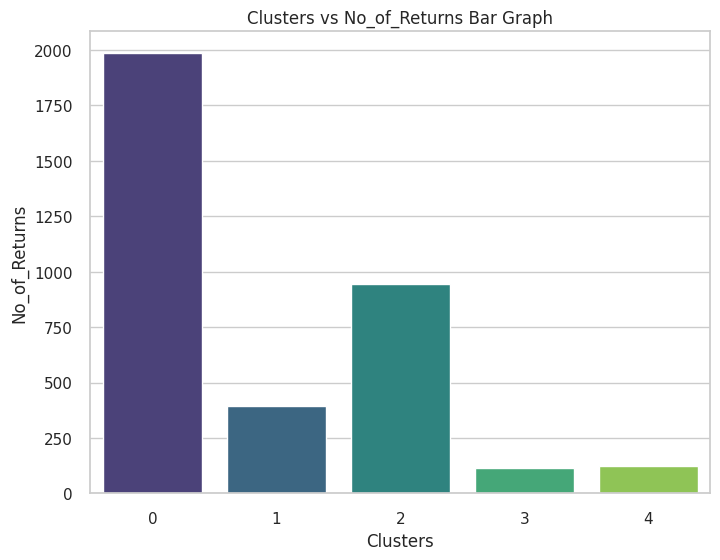

In [55]:
customer_data_returns = customer_data.groupby('Clusters')['No_of_Returns'].sum().reset_index()

# Plotting a bargraph for Clusters vs No_of_Returns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Clusters', y='No_of_Returns', data=customer_data_returns,palette='viridis')
plt.xlabel('Clusters')
plt.ylabel('No_of_Returns')
plt.title('Clusters vs No_of_Returns Bar Graph')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



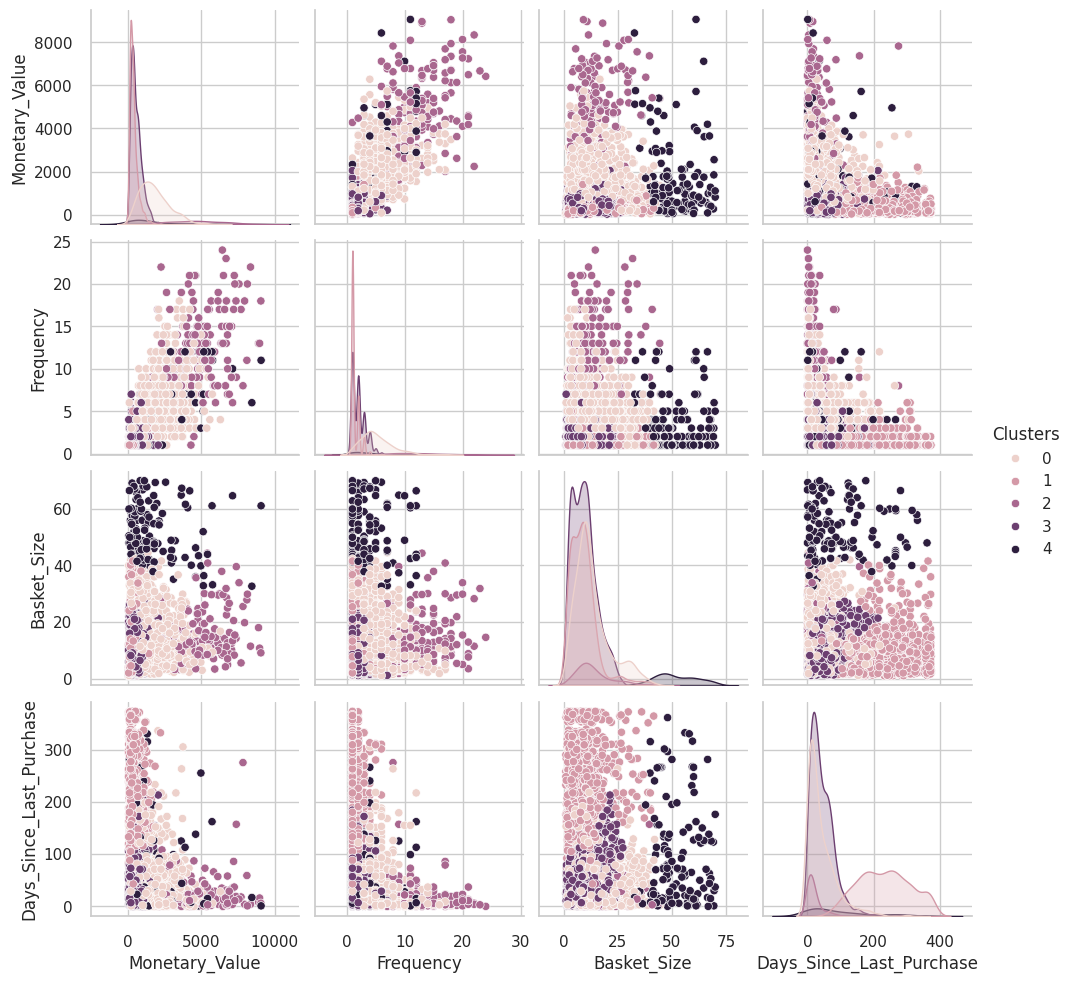

In [56]:
sns.pairplot(customer_data, vars=['Monetary_Value', 'Frequency', 'Basket_Size', 'Days_Since_Last_Purchase'], hue='Clusters')

# Market Basket Analysis

In [57]:
# Libraries import kar rahe hain
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# Display configuration set karte hain
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Warnings suppress kar rahe hain
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:

# Data ko load karke uski copy bana rahe hain

df = A.copy()


In [59]:

# Data Preprocessing function define karte hain
def prepare_data(data):
    # Missing values ko drop kar rahe hain
    data.dropna(inplace=True)

    # "POST" wali rows aur "C" wali invoices ko remove kar rahe hain
    data = data[~data["StockCode"].str.contains("POST", na=False)]
    data = data[~data["InvoiceNo"].str.contains("C", na=False)]

    # Negative values ko filter kar rahe hain
    data = data[data["Quantity"] > 0]
    data = data[data["UnitPrice"] > 0]

    # Outliers handle karne ke liye thresholds apply karenge
    for col in ["Quantity", "UnitPrice"]:
        lower_limit, upper_limit = calculate_outlier_thresholds(data, col)
        data.loc[data[col] < lower_limit, col] = lower_limit
        data.loc[data[col] > upper_limit, col] = upper_limit

    return data


In [60]:

# Outlier detection aur replacement function define kar rahe hain
def calculate_outlier_thresholds(data, column):
    Q1 = data[column].quantile(0.01)  # First quartile calculate karte hain
    Q3 = data[column].quantile(0.99)  # Third quartile calculate karte hain
    IQR = Q3 - Q1  # Interquartile range calculate karte hain
    upper_limit = Q3 + 1.5 * IQR  # Upper limit set kar rahe hain
    lower_limit = Q1 - 1.5 * IQR  # Lower limit set kar rahe hain
    return lower_limit, upper_limit


In [61]:

# Invoice aur Product matrix create karne ka function
def create_product_matrix(data, by_stockcode=True):
    if by_stockcode:
        # Matrix by StockCode banate hain jisme quantity non-zero ho toh 1 assign karte hain
        return data.groupby(['InvoiceNo', "StockCode"])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        # Matrix by Description banate hain jisme quantity non-zero ho toh 1 assign karte hain
        return data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)


In [62]:

# Stock code se product name retrieve karne ka function
def get_product_name(data, stock_code):
    product_name = data[data["StockCode"] == stock_code]["Description"].unique()[0]  # Product name ko unique value se find karte hain
    return stock_code, product_name


In [63]:

# Apriori algorithm aur association rules ke liye function define karte hain
def generate_association_rules(data, min_support=0.01):
    # Product matrix create karte hain
    product_matrix = create_product_matrix(data, by_stockcode=True)
    # Apriori algorithm ke saath frequent itemsets find karte hain
    frequent_itemsets = apriori(product_matrix, min_support=min_support, use_colnames=True)
    # Association rules generate karte hain
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=min_support)
    # Rules ko support ke basis par sort karte hain
    return rules.sort_values("support", ascending=False)


In [64]:

# Product recommendation ka function define karte hain
def recommend_products(data, target_product_id, support_threshold=0.01, max_recommendations=5):
    rules = generate_association_rules(data, support_threshold)  # Rules ko generate karte hain
    recommendations = []  # Recommendations list empty banate hain

    for idx, antecedents in enumerate(rules["antecedents"]):  # Antecedents mein target product check karte hain
        if target_product_id in antecedents:
            consequent = list(rules.iloc[idx]["consequents"])[0]  # Consequent ko list mein add karte hain
            if consequent not in recommendations:  # Unique recommendations add kar rahe hain
                recommendations.append(consequent)

    return recommendations[:max_recommendations]  # Maximum recommended items return karte hain


In [65]:

# Product recommendation system ke liye function banate hain
def product_recommendation_system(data, support_threshold=0.01, max_recommendations=5):
    product_id = input("Enter a product ID: ")  # Product ID input lete hain

    # Agar input valid hai toh recommendations generate karenge
    if product_id.isnumeric() and int(product_id) in data["StockCode"].unique():
        recommendations = recommend_products(data, int(product_id), support_threshold, max_recommendations)

        if not recommendations:  # Agar recommendation list empty hai toh message print karte hain
            print("No products available for recommendation!")
        else:
            print(f"Recommended products for product ID {product_id}:")  # Recommendations display karte hain
            for recommended_id in recommendations:
                print(get_product_name(data, recommended_id))  # Recommended product ka name display karte hain
    else:
        print("Invalid product ID. Please try again.")  # Invalid ID ke liye error message


In [66]:

# Data preparation aur filtering steps
df = prepare_data(df)
df = df[df["Country"] == "Germany"]  # Germany wale data ko filter karte hain


In [67]:

# Example usage ke liye recommendation system ko call kar rahe hain
product_recommendation_system(df)


Enter a product ID: 22745
Recommended products for product ID 22745:
(22748, "POPPY'S PLAYHOUSE KITCHEN")
(22746, "POPPY'S PLAYHOUSE LIVINGROOM ")
(22747, "POPPY'S PLAYHOUSE BATHROOM")
(22505, 'MEMO BOARD COTTAGE DESIGN')
